In [138]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
import seaborn as sns

In [ ]:
df = pd.read_csv('hiring.csv')
df

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,NaN,8.0,9,50000
1,NaN,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,NaN,7,72000
7,eleven,7.0,8,80000


#data preprocessing: fill NaN values with median value of a column and rewrite column titles




In [ ]:
df.columns = ['experience', 'test_score', 'interview_score', 'salary_dollar']
df.columns

Index(['experience', 'test_score', 'interview_score', 'salary_dollar'], dtype='object')

In [ ]:
df.head()

,experience,test_score,interview_score,salary_dollar
0,NaN,8.0,9,50000
1,NaN,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000


In [ ]:
df.test_score.median()

8.0

In [ ]:
df.test_score = df.test_score.fillna(df.test_score.median())
df

,experience,test_score,interview_score,salary_dollar
0,NaN,8.0,9,50000
1,NaN,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,8.0,7,72000
7,eleven,7.0,8,80000


In [ ]:
df.experience=df.experience.fillna('zero')

In [ ]:
pip install word2number

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from word2number import w2n
df.experience = df.experience.apply(w2n.word_to_num)

In [ ]:
df

,experience,test_score,interview_score,salary_dollar
0,0,8.0,9,50000
1,0,8.0,6,45000
2,5,6.0,7,60000
3,2,10.0,10,65000
4,7,9.0,6,70000
5,3,7.0,10,62000
6,10,8.0,7,72000
7,11,7.0,8,80000


In [ ]:
reg = linear_model.LinearRegression()
#reg.fit(df[['experience','test_score','interview_score']],df.salary_dollar)
reg.fit(df.drop('salary_dollar', axis ='columns'), df.salary_dollar)

LinearRegression()

#To predict salary for a candidate with 2yrs experience, test_score of 9, and interview_score of 6


In [ ]:
reg.predict([[2,9,6]])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


array([53205.96797671])

# To predict salary for a candidate with 12yrs experience, test_score of 10, and interview_score of 10

In [125]:
reg.predict([[12,10,10]])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


array([92002.18340611])

#validating predictions

In [126]:
reg.coef_ #this  is an array/coefficient of the three independent variables; experience, test_score, interview_score consecutively. 

array([2812.95487627, 1845.70596798, 2205.24017467])

In [127]:
reg.intercept_

17737.263464337688

In [131]:
#y =mx + c
#dependent variable = (slope or gradient * independent variable ) + intercept. the coefficient of x represents the gradient, i.e "m"
#salary_dollar = (coef1*experience + coef2*test_score + coef3*interview_score)
salary_dollar1 = (2812.95487627*2 +1845.70596798 *9 + 2205.24017467*6) + 17737.263464337688
salary_dollar1

53205.96797671769

In [130]:
salary_dollar2 = (2812.95487627*12 +1845.70596798 *10 + 2205.24017467*10) + 17737.263464337688
salary_dollar2

92002.18340607767

#Visualization

In [144]:
df

,experience,test_score,interview_score,salary_dollar
0,0,8.0,9,50000
1,0,8.0,6,45000
2,5,6.0,7,60000
3,2,10.0,10,65000
4,7,9.0,6,70000
5,3,7.0,10,62000
6,10,8.0,7,72000
7,11,7.0,8,80000


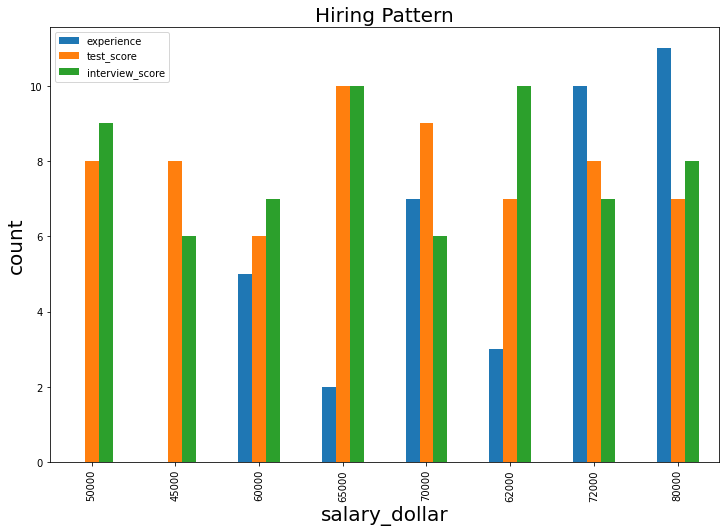

In [143]:
#plt.scatter(df, df.salary_dollar, color = 'red', marker = '*')
#plt.plot(df.experience, reg.predict(df[['salary_dollar']]),color = 'green')
#plt.xlabel('experience','test_score', 'interview_score')
#plt.ylabel('salary_dollar')
#plt.title('Hiring pattern')
#df=pd.DataFrame(hiring,columns=['salary','test_score','interview','experience'])
df.plot(x='salary_dollar',y=['experience','test_score','interview_score',],kind='bar',figsize=(12,8));
plt.xlabel('salary_dollar',fontsize=20)
plt.ylabel('count',fontsize=20)
plt.title('Hiring Pattern', fontsize=20);